In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

In [2]:
from numpy import genfromtxt
data1 = genfromtxt('data1.csv', delimiter=',')
X = data1[:,:-1]
y = data1[:, -1]

In [3]:
def accuracy(ypred,ys):
    ypred=ypred+1
    acc=0
    for i in range(len(ys)):
        if ys[i]==ypred[i]:
            acc+=1
    print('accuracy:',acc/len(ys)*100,'%')

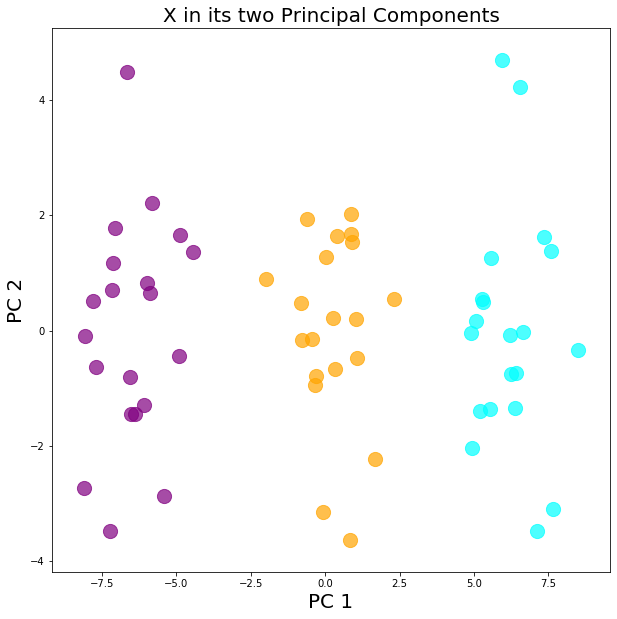

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_axes = pca.fit_transform(X)
pca_data = pd.DataFrame(
    data=pca_axes, 
    columns=['PC1', 'PC2'])
colordict={1.:'orange',2.:'cyan',3.:'purple'}
plt.figure(figsize=(10,10))
plt.title("X in its two Principal Components",fontsize=20)
plt.xlabel("PC 1",fontsize=20)
plt.ylabel("PC 2",fontsize=20)
for i in range(len(pca_data)):
    plt.scatter(pca_data['PC1'].iloc[i],pca_data['PC2'].iloc[i],color=colordict[y[i]],s=200,alpha=0.7)

In [7]:
from sklearn.cluster import KMeans

#### Clustering with all the components with K=3

In [8]:
kmeans1 = KMeans(n_clusters=3).fit(X)
print("with K=3 and all the dimensions of the data the accuracy we acheive is")
accuracy(kmeans1.labels_,y)

with K=3 and all the dimensions of the data the accuracy we acheive is
accuracy: 33.33333333333333 %


#### Clustering with all the components with K=2

In [9]:
kmeans2 = KMeans(n_clusters=2).fit(X)
print("with K=2 and all the dimensions of the data the accuracy we acheive is")
accuracy(kmeans2.labels_,y)

with K=2 and all the dimensions of the data the accuracy we acheive is
accuracy: 31.666666666666664 %


#### Clustering with all the components with K=4

In [10]:
kmeans3 = KMeans(n_clusters=4).fit(X)
print("with K=4 and all the dimensions of the data the accuracy we acheive is")
accuracy(kmeans3.labels_,y)

with K=4 and all the dimensions of the data the accuracy we acheive is
accuracy: 23.333333333333332 %


#### Clustering with the two principle components with K = 3

In [11]:
kmeans4 = KMeans(n_clusters=3).fit(pca_data)
print("with K=3 and only the principal dimensions of the data the accuracy we acheive is")
accuracy(kmeans4.labels_,y)

with K=3 and only the principal dimensions of the data the accuracy we acheive is
accuracy: 100.0 %


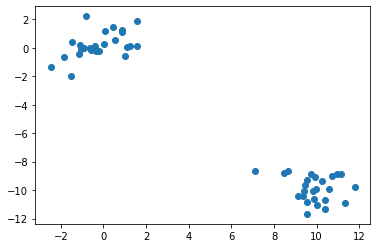

In [13]:
data2 = np.genfromtxt('data2.csv', delimiter=',')
plt.scatter(data2[:,0], data2[:,1])

From the scatter plot we can see two different clusters in the dataset. 

#### Inter Observational Distance

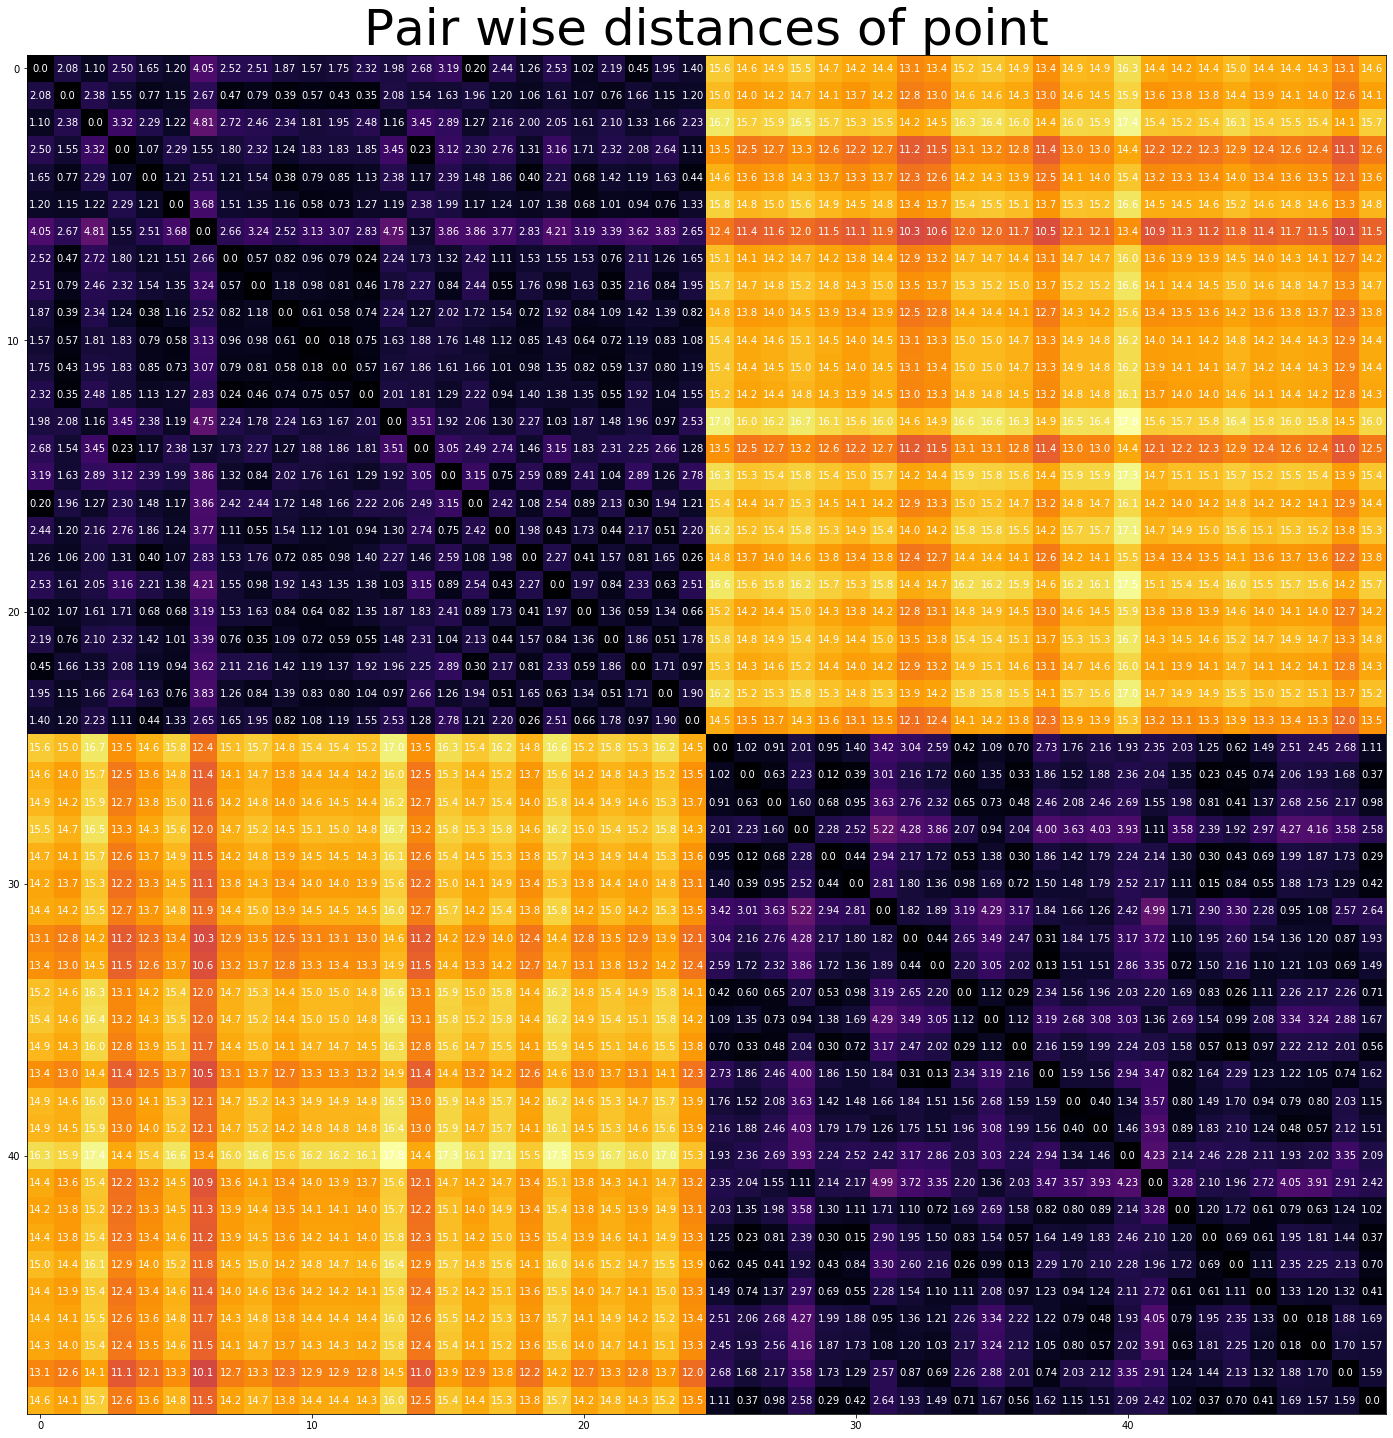

In [14]:
# Inter Observational Distance
distances=pairwise_distances(data2)
plt.figure(figsize=(25,25))
plt.imshow(distances,cmap='inferno')
plt.title("Pair wise distances of point",fontsize=50)
for i in range(len(data2)):
    for j in range(len(data2)):
        plt.text(i,j,str(distances[i][j])[:4],va='center',ha='center',color='white')

#### Dendogram

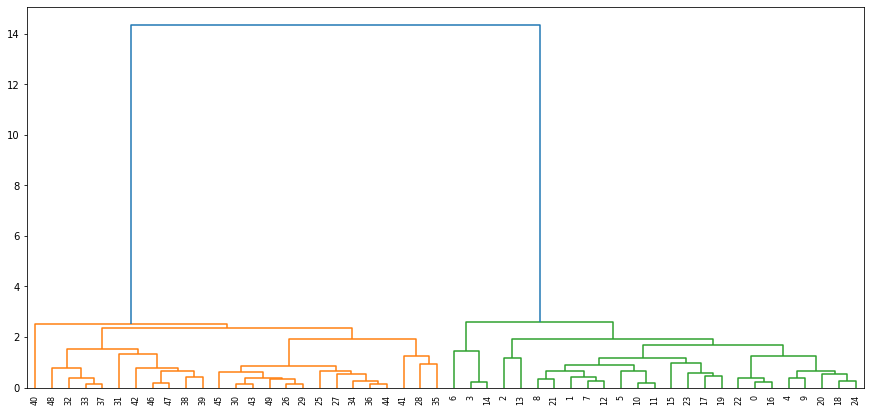

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

avg = linkage(data2, method='average')

# Plot the resulting dendrogram
plt.figure(figsize=(15, 7))
dendrogram(avg)
plt.show()

#### Cluster Labels

In [16]:
from scipy.cluster.hierarchy import cut_tree

Tree = cut_tree(avg, n_clusters=2)
print(Tree.reshape(-1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
